We're going to plot the descriptive statistics for the pilot subject's performance in terms of changes in accuracy and reaction times across the behavioral session.

In [1]:
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# set figure aesthetics
sns.set_style("ticks", {'axes.grid' : True, 'grid.color':'.9'})
sns.set_context('notebook', font_scale=1.5, rc={"lines.linewidth": 2.5, 'grid.linewidth':1.5})

# Load csv files into pandas

Pilot subject 2 will not be analyzed because something went wrong during csv writing.

In [3]:
# show content of behavioral data directory
glob.glob('../behav_data/behav_pilot/*')

['../behav_data/behav_pilot/sub06_block1_behav.csv',
 '../behav_data/behav_pilot/sub06_behav.csv',
 '../behav_data/behav_pilot/sub04_block3_behav.csv',
 '../behav_data/behav_pilot/sub05_block2_behav.csv',
 '../behav_data/behav_pilot/sub07_block6_behav.csv',
 '../behav_data/behav_pilot/sub05_block4_behav.csv',
 '../behav_data/behav_pilot/sub04_block5_behav.csv',
 '../behav_data/behav_pilot/sub07_allblocks_behav.csv',
 '../behav_data/behav_pilot/sub07_block1_behav.csv',
 '../behav_data/behav_pilot/sub07_behav.csv',
 '../behav_data/behav_pilot/sub06_allblocks_behav.csv',
 '../behav_data/behav_pilot/sub05_allblocks_behav.csv',
 '../behav_data/behav_pilot/sub04_block2_behav.csv',
 '../behav_data/behav_pilot/sub04_allblocks_behav.csv',
 '../behav_data/behav_pilot/sub05_block3_behav.csv',
 '../behav_data/behav_pilot/sub01_behav.csv',
 '../behav_data/behav_pilot/sub06_block6_behav.csv',
 '../behav_data/behav_pilot/sub05_block5_behav.csv',
 '../behav_data/behav_pilot/sub04_block4_behav.csv',
 '

In [4]:
# generate file paths for the subjects to analyze
n_subs = 7
exclude_subs = [2]

sub_paths = [
    '../behav_data/behav_pilot/sub%02d_behav.csv' % sub_int
    for sub_int in range(1, n_subs+1)
    if not sub_int in exclude_subs
]

sub_paths

['../behav_data/behav_pilot/sub01_behav.csv',
 '../behav_data/behav_pilot/sub03_behav.csv',
 '../behav_data/behav_pilot/sub04_behav.csv',
 '../behav_data/behav_pilot/sub05_behav.csv',
 '../behav_data/behav_pilot/sub06_behav.csv',
 '../behav_data/behav_pilot/sub07_behav.csv']

In [5]:
# create labels for figure legends
legend_labels = [
    sub_path.split('/')[-1].replace('_behav.csv', '')
    for sub_path in sub_paths
]

legend_labels

['sub01', 'sub03', 'sub04', 'sub05', 'sub06', 'sub07']

In [6]:
# load all subjects into one data frame

dfs = []
for sub in sub_paths:
    df = pd.read_csv(sub, index_col=None, header=0)
    dfs.append(df)
    
df = pd.concat(dfs, axis = 0, ignore_index = True)

In [7]:
# manage data types of some columnes
df['acc'] = df.accuracy.astype('float')

In [8]:
df.head()

,vision,rotation,file_path,object_id,object_name,set,Geschlecht,SubjectID,Alter,Rechtshaendig,...,distr_pos,distractors,rt,accuracy,clicked_distractor,mouse_pressed,keys,ran,block,acc
0,ri_percept,270,./Stimuli/percepts/642_r270_ri_percept.png,642,Tacker,training,weiblich,1,24,True,...,"[[-9.5, -6], [9.5, -6], [-9.5, -9], [0, -9], [...","['Dose', 'Rahmen', 'Tasse', 'Hut', 'Kanne', 'W...",NaN,0,NaN,NaN,[],True,1.0,0.0
1,ri_percept,225,./Stimuli/percepts/642_r225_ri_percept.png,642,Tacker,training,weiblich,1,24,True,...,"[[-9.5, -6], [0.0, -6.0], [9.5, -6], [0, -9], ...","['Kanne', 'Wuerfel', 'Hut', 'Dose', 'Rahmen', ...",NaN,0,NaN,NaN,[],True,1.0,0.0
2,ri_percept,45,./Stimuli/percepts/979_r45_ri_percept.png,979,Hut,training,weiblich,1,24,True,...,"[[-9.5, -6], [0.0, -6.0], [9.5, -6], [-9.5, -9...","['Tasse', 'Dose', 'Locher', 'Wuerfel', 'Tacker...",NaN,0,NaN,NaN,[],True,1.0,0.0
3,ri_percept,180,./Stimuli/percepts/405_r180_ri_percept.png,405,Locher,training,weiblich,1,24,True,...,"[[-9.5, -6], [0.0, -6.0], [9.5, -6], [-9.5, -9...","['Kanne', 'Rahmen', 'Tasse', 'Wuerfel', 'Hut',...",2.650715,0,Rahmen,True,[],True,1.0,0.0
4,ri_percept,225,./Stimuli/percepts/125_r225_ri_percept.png,125,Tasse,training,weiblich,1,24,True,...,"[[-9.5, -6], [0.0, -6.0], [9.5, -6], [0, -9], ...","['Dose', 'Wuerfel', 'Rahmen', 'Tacker', 'Hut',...",3.650646,1,NaN,True,[],True,1.0,1.0


# Plot

[(0.4, 1), Text(0,0.5,''), Text(0.5,0,'Block')]

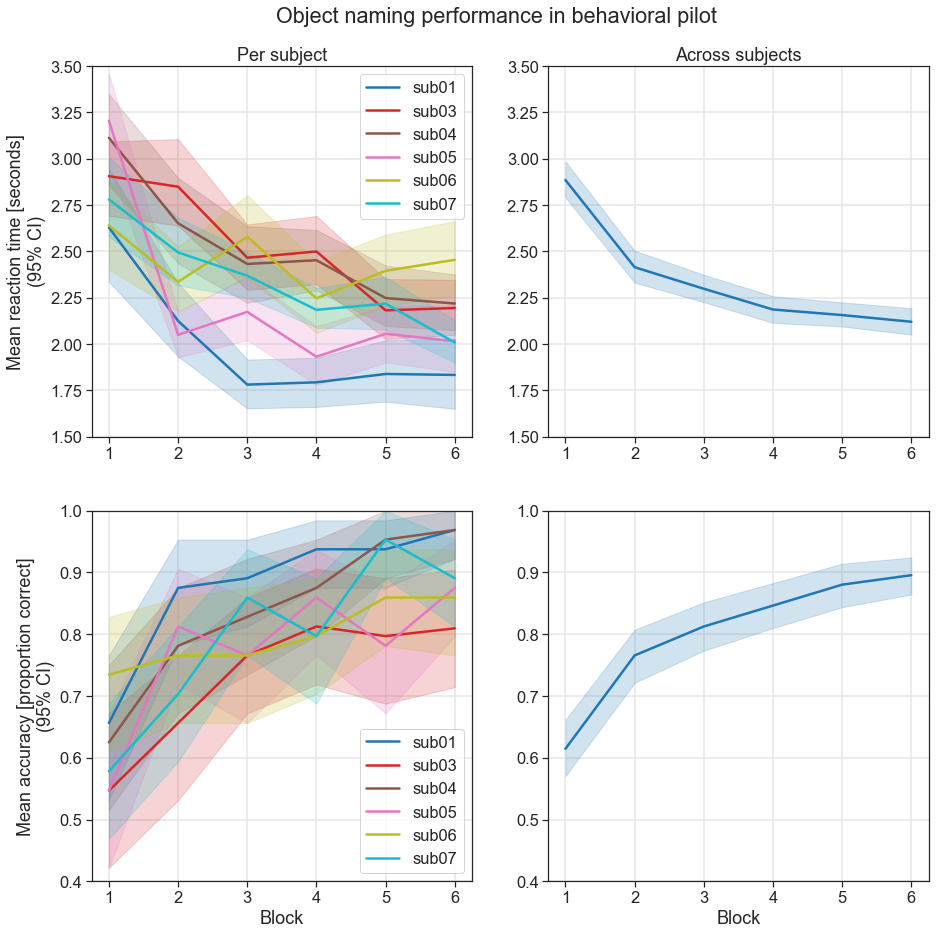

In [18]:
fig, axes = plt.subplots(figsize=(15,15), ncols=2, nrows=2)

fig.suptitle("Object naming performance in behavioral pilot", y=.935)

figkwargs = {'err_style':'band', 'ci':95, 'data':df, 'x':'block'}

# RT by subject
sns.lineplot(y="rt", hue="SubjectID", ax=axes[0][0], palette='tab10', **figkwargs)
axes[0][0].legend(legend_labels)
axes[0][0].set(xlabel="", ylabel="Mean reaction time [seconds]\n(95% CI)", title='Per subject', ylim=(1.5, 3.5))

# RT across subjects
sns.lineplot(y="rt", ax=axes[0][1], **figkwargs)
axes[0][1].set(ylabel='', xlabel='', title='Across subjects', ylim=(1.5, 3.5))
#axes[0][1].yaxis.set_ticklabels([])

# Accuracies by subject
sns.lineplot(y="acc", hue='SubjectID', palette='tab10', ax=axes[1][0], **figkwargs)
axes[1][0].set(ylabel="Mean accuracy [proportion correct]\n(95% CI)", ylim=(.4, 1), xlabel='Block')
axes[1][0].legend(legend_labels)

# Accuracies across subjects
sns.lineplot(y="acc",ax=axes[1][1], **figkwargs)
axes[1][1].set(ylim=(.4,1), xlabel="Block", ylabel='')